<a href="https://colab.research.google.com/github/john2408/ml_algorithms_basics/blob/main/Supervised_and_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Trends API for Python

## In this tutorial, I will demonstrate how to use the Google Trends API for getting the current trending topics on the internet.


![alt text](https://cdn-images-1.medium.com/max/1200/1*Fi6masemXJT3Q8YWekQCDQ.png)

# Introduction

[Google trends](https://trends.google.com/trends/?geo=US) is a website that analyzes and lists the popular search results on Google search based on various regions and languages. Google Trends is Google's website (obviously). With the help of this tutorial, you can get the trending results and many more from google trends website using python. You don't need to manually search and copy the trending results, the Python API called `pytrends` does the job for you. Before getting started, I want all of you guys to go through the official documentation of the `pytrends` API.

[pytrends API](https://pypi.org/project/pytrends/)



---

# Installation

The first step is to install the library manually. So, open your favorite IDE or notebook start typing the following code. I will use [Google Colab](https://colab.research.google.com/) because it's my favorite notebook.



> If you are using jupyter notebook, just type the code as it is (make sure you have '!' at the beginning)


In [1]:
!pip install tensorflow shap

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

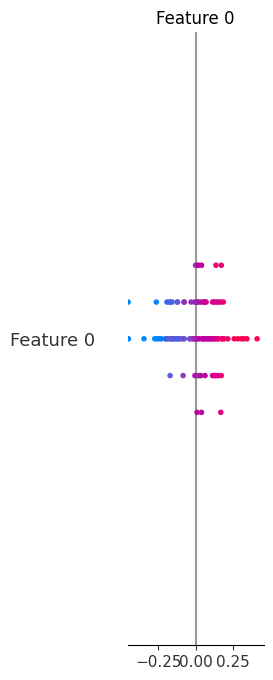

In [3]:
   import shap
   from tensorflow.keras.models import Sequential
   from tensorflow.keras.layers import Dense
   import numpy as np
   from sklearn.model_selection import train_test_split
   from sklearn.datasets import make_classification

   # Generate synthetic data
   X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   # Define and fit a simple neural network model
   model = Sequential()
   model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
   model.add(Dense(1, activation='sigmoid'))
   model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
   model.fit(X_train, y_train, epochs=10, verbose = 0)

   # Using a subset of testing dataset for explaination
   X_sample = X_test[:100]

   #Create explainer
   explainer = shap.KernelExplainer(model.predict, X_sample)

   #Calculate shap values
   shap_values = explainer.shap_values(X_sample)

   # Plot results
   shap.summary_plot(shap_values, X_sample, plot_type="bar")

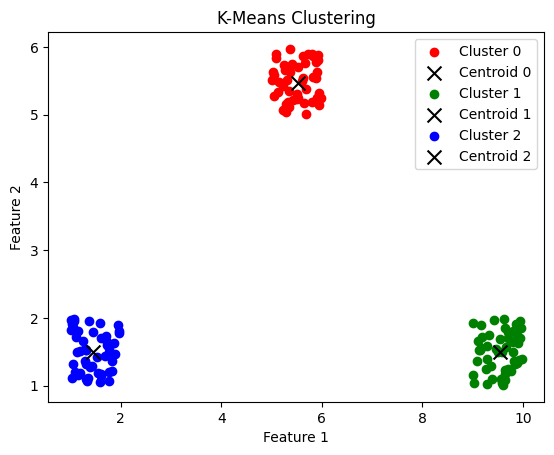

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic dataset
np.random.seed(42)
data = np.vstack((np.random.rand(50, 2) + [1, 1], np.random.rand(50, 2) + [5, 5], np.random.rand(50, 2) + [9, 1]))

# Step 2: K-Means Algorithm
def kmeans(data, k, max_iters=100, tol=1e-4):
    # Randomly initialize centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for _ in range(max_iters):
        # Step 3: Assignment Step
        clusters = {}
        for i in range(k):
            clusters[i] = []

        for point in data:
            distances = [np.linalg.norm(point - centroid) for centroid in centroids]
            cluster = np.argmin(distances)
            clusters[cluster].append(point)

        # Step 4: Update Step
        new_centroids = np.array([np.mean(clusters[i], axis=0) for i in clusters])

        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids

    return centroids, clusters

# Step 5: Run K-Means with k=3
k = 3
centroids, clusters = kmeans(data, k)

# Step 6: Plot the results
colors = ['r', 'g', 'b']
for i in range(k):
    cluster_points = np.array(clusters[i])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}')
    plt.scatter(centroids[i][0], centroids[i][1], c='black', marker='x', s=100, label=f'Centroid {i}')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

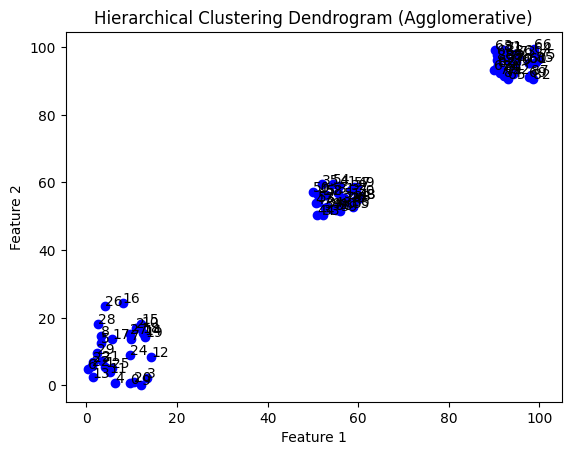

In [96]:
import math
import random
import matplotlib.pyplot as plt

# Step 1: Generate a synthetic dataset with more random data points
random.seed(42)
data = [[random.uniform(0, 15), random.uniform(0, 25)] for _ in range(30)] + \
       [[random.uniform(50, 60), random.uniform(50, 60)] for _ in range(30)] + \
       [[random.uniform(90, 100), random.uniform(90, 100)] for _ in range(30)]

# Step 2: Helper functions
def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

def compute_distance_matrix(data):
    """Compute the distance matrix for the dataset."""
    n = len(data)
    distance_matrix = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(i+1, n):
            distance_matrix[i][j] = distance_matrix[j][i] = euclidean_distance(data[i], data[j])
    return distance_matrix

def find_closest_clusters(distance_matrix):
    """Find the two closest clusters based on the distance matrix."""
    min_distance = float('inf')
    cluster_pair = (None, None)
    n = len(distance_matrix)
    for i in range(n):
        for j in range(i+1, n):
            if distance_matrix[i][j] < min_distance:
                min_distance = distance_matrix[i][j]
                cluster_pair = (i, j)
    return cluster_pair

def update_distance_matrix(distance_matrix, clusters, cluster1, cluster2):
    """Update the distance matrix after merging two clusters."""
    n = len(distance_matrix)
    for i in range(n):
        if i != cluster1 and i != cluster2:
            new_distance = min(distance_matrix[cluster1][i], distance_matrix[cluster2][i])
            distance_matrix[cluster1][i] = distance_matrix[i][cluster1] = new_distance
    distance_matrix[cluster1][cluster1] = 0
    for row in distance_matrix:
        del row[cluster2]
    del distance_matrix[cluster2]
    clusters[cluster1].extend(clusters[cluster2])
    del clusters[cluster2]

# Step 3: Hierarchical Clustering
def hierarchical_clustering(data):
    """Perform Agglomerative Hierarchical Clustering."""
    clusters = [[i] for i in range(len(data))]
    distance_matrix = compute_distance_matrix(data)

    while len(clusters) > 1:
        cluster1, cluster2 = find_closest_clusters(distance_matrix)
        update_distance_matrix(distance_matrix, clusters, cluster1, cluster2)

    return clusters[0]

# Step 4: Run Hierarchical Clustering
final_cluster = hierarchical_clustering(data)

# Step 5: Plot the dendrogram (simple representation)
def plot_dendrogram(data, clusters):
    """Plot a simple representation of the dendrogram."""
    x_coords = [point[0] for point in data]
    y_coords = [point[1] for point in data]

    plt.scatter(x_coords, y_coords, c='blue')

    for i, txt in enumerate(range(len(data))):
        plt.annotate(txt, (x_coords[i], y_coords[i]))

    plt.title('Hierarchical Clustering Dendrogram (Agglomerative)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_dendrogram(data, final_cluster)

In [89]:
import random
import math

n = 200
data = [[random.uniform(1, 10), random.uniform(1, 10), random.uniform(1, 10)] for _ in range(n)]

def euclidian_distance(p1, p2):
  return math.sqrt(sum((p1 -p2)**2 for p1, p2 in zip(p1, p2)))

def mean(points):
  n = len(points)
  dimensions = len(points[0])
  return [sum(point[dim] for point in points)/n for dim in range(dimensions)]

def k_means(data, k, max_iter=100, tol=1e-4):
  centroids = random.sample(data, k )
  prev_centroids = centroids
  for _ in range(max_iter):
    clusters = {i : [] for i in range(k)}
    for point in data:
      distances = [euclidian_distance(point, centroid) for centroid in centroids]
      cluster = distances.index(min(distances))
      clusters[cluster].append(point)

    centroids = [mean(clusters[i]) for i in range(k)]

    shift = sum(euclidian_distance(c1, c2) for c1, c2 in zip(centroids, prev_centroids))

    if shift <= tol:
      break

    pre_centroids = centroids

  return clusters, centroids

k = 3
clusters, centroids = k_means(data, k)


In [92]:
clusters

{0: [[2.29193781971998, 7.612681324993672, 9.031207400336498],
  [2.811110499994735, 4.8858483695482935, 9.241612895290631],
  [1.5095115060994249, 5.6133726102951655, 6.117761966886257],
  [4.035913852489321, 4.7475714241982505, 5.36874117244945],
  [5.018884722791782, 6.822455901441601, 8.425654696822892],
  [3.2987785793223052, 3.893598183918071, 8.291227254364381],
  [3.066046209032279, 9.149754571071336, 4.984083756737443],
  [3.509690462804495, 4.51778034545125, 9.88233937377919],
  [3.3625504802074517, 4.927796721760595, 4.817122540337067],
  [3.5786607971941176, 8.82885118635491, 7.97160830176843],
  [4.324579436480564, 9.383787794379495, 7.762286186555826],
  [1.8433568110807648, 4.405302634330711, 5.883990132391609],
  [5.291326402086802, 7.55640088319868, 9.381388790965442],
  [1.2974700161188826, 3.4144129433918904, 9.98652908252992],
  [2.0912774707999935, 3.3892904178621324, 6.448339517300563],
  [2.451847701303148, 9.100140284115987, 8.335556922992328],
  [1.711180731953

In [84]:
import matplotlib.pyplot as plt
import numpy as np

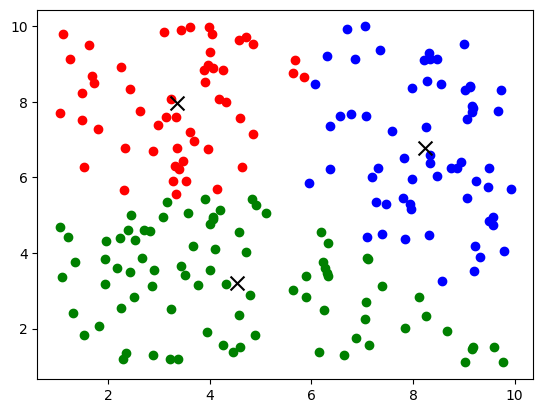

In [88]:
colors = ['r', 'g', 'b']
for i in range(k):
  cluster_points = np.array(clusters[i])
  X, Y = cluster_points[:,0], cluster_points[:,1]
  cx, cy = centroids[i][0], centroids[i][1]

  plt.scatter(X, Y, c= colors[i], label=f"Cluster {i}")
  plt.scatter(cx, cy, color='black', marker="x", s=100, label=f"Centroid {i}")

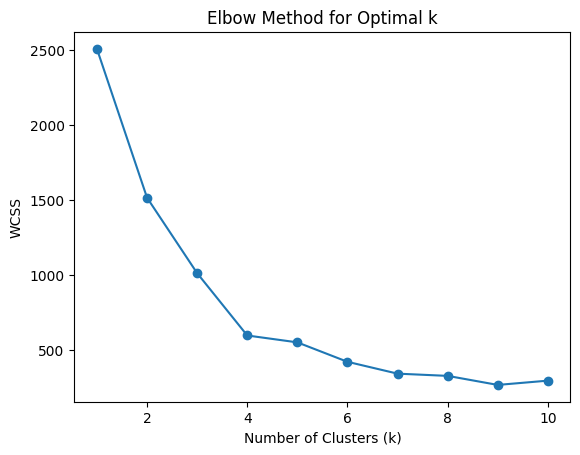

In [125]:
import random
import math
import matplotlib.pyplot as plt

# Generate synthetic data
n = 200
data = [[random.uniform(1, 10), random.uniform(1, 10)] for _ in range(n)]

# Euclidean distance function
def euclidian_distance(p1, p2):
  return math.sqrt(sum((p1 - p2)**2 for p1, p2 in zip(p1, p2)))

# Mean of points in each cluster
def mean(points):
  n = len(points)
  dimensions = len(points[0])
  return [sum(point[dim] for point in points) / n for dim in range(dimensions)]

# K-means algorithm
def k_means(data, k, max_iter=100, tol=1e-4):
  centroids = random.sample(data, k)
  prev_centroids = centroids
  for _ in range(max_iter):
    clusters = {i: [] for i in range(k)}
    for point in data:
      distances = [euclidian_distance(point, centroid) for centroid in centroids]
      cluster = distances.index(min(distances))
      clusters[cluster].append(point)

    centroids = [mean(clusters[i]) for i in range(k)]

    shift = sum(euclidian_distance(c1, c2) for c1, c2 in zip(centroids, prev_centroids))

    if shift <= tol:
      break

    prev_centroids = centroids

  return clusters, centroids

# WCSS calculation function
def calculate_wcss(data, clusters, centroids):
    wcss = 0
    for i in range(len(centroids)):
        for point in clusters[i]:
            wcss += euclidian_distance(point, centroids[i])**2
    return wcss

# Elbow Method for optimal k
wcss_values = []
k_range = range(1, 11)  # Trying k values from 1 to 10

for k in k_range:
    clusters, centroids = k_means(data, k)
    wcss = calculate_wcss(data, clusters, centroids)
    wcss_values.append(wcss)

# Plotting WCSS values against k
plt.plot(k_range, wcss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

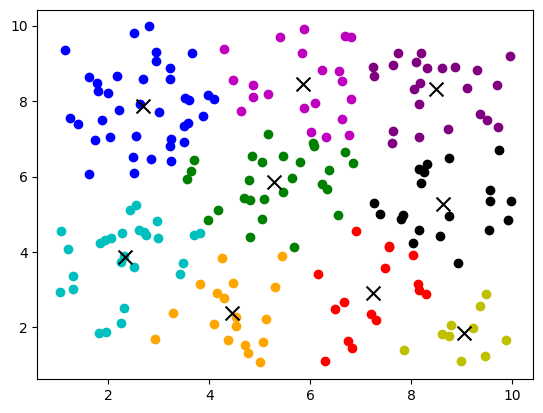

In [127]:

k = 9
clusters, centroids = k_means(data, k)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple']

for i in range(k):
  cluster_points = np.array(clusters[i])
  X, Y = cluster_points[:,0], cluster_points[:,1]
  cx, cy = centroids[i][0], centroids[i][1]

  plt.scatter(X, Y, c= colors[i], label=f"Cluster {i}")
  plt.scatter(cx, cy, color='black', marker="x", s=100, label=f"Centroid {i}")

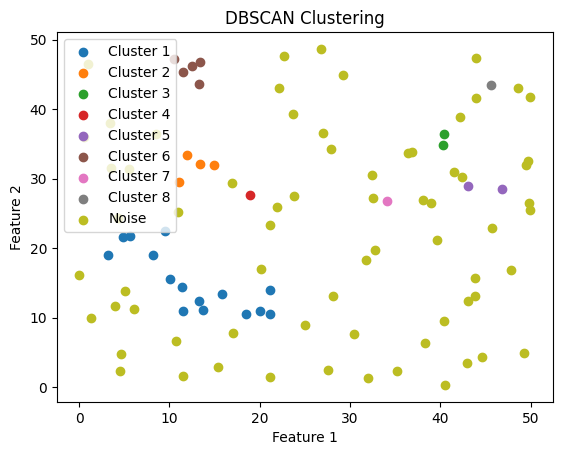

In [97]:
import math
import random

# Step 1: Helper Functions
def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

def region_query(data, point_idx, epsilon):
    """Find points in the epsilon neighborhood of the point with index point_idx."""
    neighbors = []
    for i in range(len(data)):
        if euclidean_distance(data[point_idx], data[i]) < epsilon:
            neighbors.append(i)
    return neighbors

def expand_cluster(data, labels, point_idx, cluster_id, epsilon, min_points):
    """Expand the cluster by finding all density-reachable points."""
    neighbors = region_query(data, point_idx, epsilon)
    if len(neighbors) < min_points:
        labels[point_idx] = -1  # Mark as noise
        return False
    else:
        labels[point_idx] = cluster_id
        for neighbor_idx in neighbors:
            if labels[neighbor_idx] == 0:  # Unvisited
                labels[neighbor_idx] = cluster_id
                expand_cluster(data, labels, neighbor_idx, cluster_id, epsilon, min_points)
        return True

def dbscan(data, epsilon, min_points):
    """Perform DBSCAN clustering."""
    labels = [0] * len(data)  # 0 indicates unvisited
    cluster_id = 0

    for point_idx in range(len(data)):
        if labels[point_idx] == 0:  # If the point is unvisited
            if expand_cluster(data, labels, point_idx, cluster_id + 1, epsilon, min_points):
                cluster_id += 1

    return labels

# Step 2: Generate a synthetic dataset
random.seed(42)
data = [[random.uniform(0, 50), random.uniform(0, 50)] for _ in range(100)]

# Step 3: Run DBSCAN
epsilon = 5
min_points = 5
labels = dbscan(data, epsilon, min_points)

# Step 4: Visualization
import matplotlib.pyplot as plt

def plot_dbscan(data, labels):
    """Plot the clustering results of DBSCAN."""
    unique_labels = set(labels)
    for label in unique_labels:
        cluster_points = [data[i] for i in range(len(data)) if labels[i] == label]
        x_coords = [point[0] for point in cluster_points]
        y_coords = [point[1] for point in cluster_points]
        plt.scatter(x_coords, y_coords, label=f'Cluster {label}' if label != -1 else 'Noise')

    plt.title('DBSCAN Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_dbscan(data, labels)

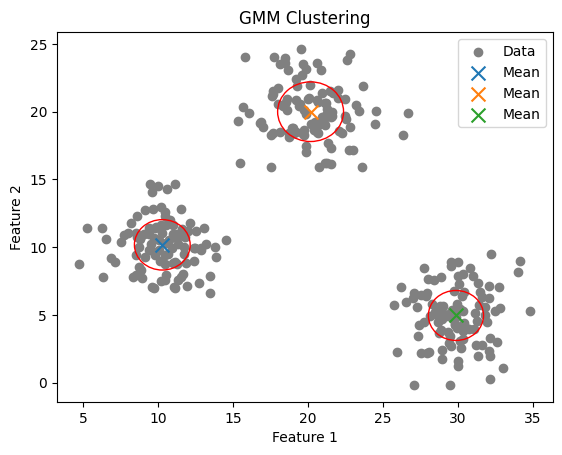

In [98]:
import random
import math
from collections import defaultdict

# Step 1: Generate synthetic data
random.seed(42)
data = [[random.gauss(10, 2), random.gauss(10, 2)] for _ in range(100)] + \
       [[random.gauss(20, 2), random.gauss(20, 2)] for _ in range(100)] + \
       [[random.gauss(30, 2), random.gauss(5, 2)] for _ in range(100)]

# Helper functions
def gaussian_pdf(x, mean, cov):
    """Calculate the probability density function of a Gaussian."""
    size = len(x)
    det = math.prod([cov[i][i] for i in range(size)])
    norm_const = 1.0 / (math.pow((2 * math.pi), float(size) / 2) * math.pow(det, 1.0 / 2))
    x_mu = [x[i] - mean[i] for i in range(size)]
    inv_cov = [[1 / cov[i][i] if i == j else 0 for j in range(size)] for i in range(size)]
    result = math.exp(-0.5 * sum(x_mu[i] * inv_cov[i][i] * x_mu[i] for i in range(size)))
    return norm_const * result

# Step 2: GMM Initialization
K = 3  # Number of Gaussian components
means = [[random.uniform(0, 40), random.uniform(0, 40)] for _ in range(K)]
covariances = [[[5, 0], [0, 5]] for _ in range(K)]
weights = [1 / K] * K

# Step 3: Expectation-Maximization
def gmm_em(data, means, covariances, weights, max_iter=100):
    """Fit a Gaussian Mixture Model using the EM algorithm."""
    for _ in range(max_iter):
        # E-step: Calculate responsibilities
        responsibilities = defaultdict(list)
        for i, x in enumerate(data):
            probs = [weights[k] * gaussian_pdf(x, means[k], covariances[k]) for k in range(K)]
            total_prob = sum(probs)
            responsibilities[i] = [prob / total_prob for prob in probs]

        # M-step: Update parameters
        for k in range(K):
            Nk = sum(responsibilities[i][k] for i in range(len(data)))
            weights[k] = Nk / len(data)
            means[k] = [sum(responsibilities[i][k] * data[i][dim] for i in range(len(data))) / Nk for dim in range(2)]
            covariances[k] = [[0, 0], [0, 0]]
            for i in range(len(data)):
                diff = [data[i][dim] - means[k][dim] for dim in range(2)]
                for j in range(2):
                    covariances[k][j][j] += responsibilities[i][k] * diff[j] * diff[j] / Nk

    return means, covariances, weights

# Step 4: Run GMM
final_means, final_covariances, final_weights = gmm_em(data, means, covariances, weights)

# Step 5: Visualization
import matplotlib.pyplot as plt

def plot_gmm(data, means, covariances):
    """Plot the GMM clustering results."""
    x_coords = [point[0] for point in data]
    y_coords = [point[1] for point in data]
    plt.scatter(x_coords, y_coords, c='gray', label='Data')

    for mean, cov in zip(means, covariances):
        plt.scatter(mean[0], mean[1], s=100, marker='x', label='Mean')
        plt.gca().add_patch(plt.Circle(mean, math.sqrt(cov[0][0]), color='r', fill=False))

    plt.title('GMM Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_gmm(data, final_means, final_covariances)

In [118]:
def mean(X):
  return sum(X)/len(X)

def standard_deviation(X):
  n = len(X)
  mean_x = mean(X)
  var = (1/n) * sum((x - mean_x) **2 for x in X)
  return math.sqrt(var)


def covariance(X, Y):
  n = len(X)
  mean_x = mean(X)
  mean_y = mean(Y)
  cov = (1/n)*sum((x - mean_x)*(y-mean_y) for x,y in zip(X,Y))
  return cov


def correlation(X, Y):
  cov = covariance(X, Y)
  std_x = standard_deviation(X)
  std_y = standard_deviation(Y)
  return cov/(std_x * std_y)

X = [random.gauss(10, 2) for _ in range(100)]
Y = [random.gauss(5, 3) for _ in range(100)]

In [121]:
print("Standard Deviation ", standard_deviation(X))
print("Mean ", mean(X))
print("Covariance ", covariance(X, Y))
print("Correlation ", correlation(X, Y))

Standard Deviation  2.0672694918544443
Mean  9.842752524899739
Covariance  -0.030146597759115483
Correlation  -0.004495099575369531


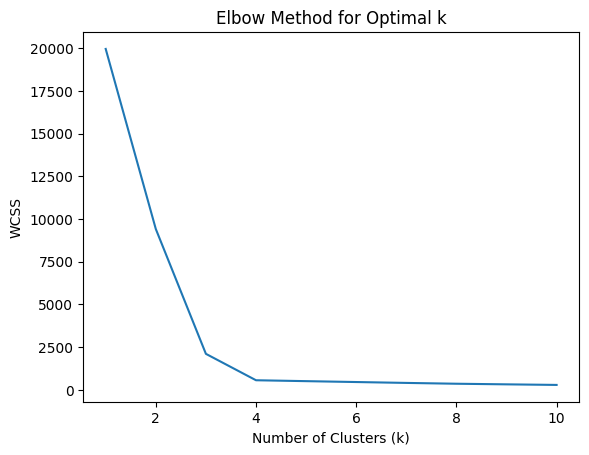

In [122]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Example data (replace with your own data)
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Step 1: Compute WCSS for a range of k values
wcss = []
for k in range(1, 11):  # Trying k values from 1 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Step 2: Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

Predicted Class: 0


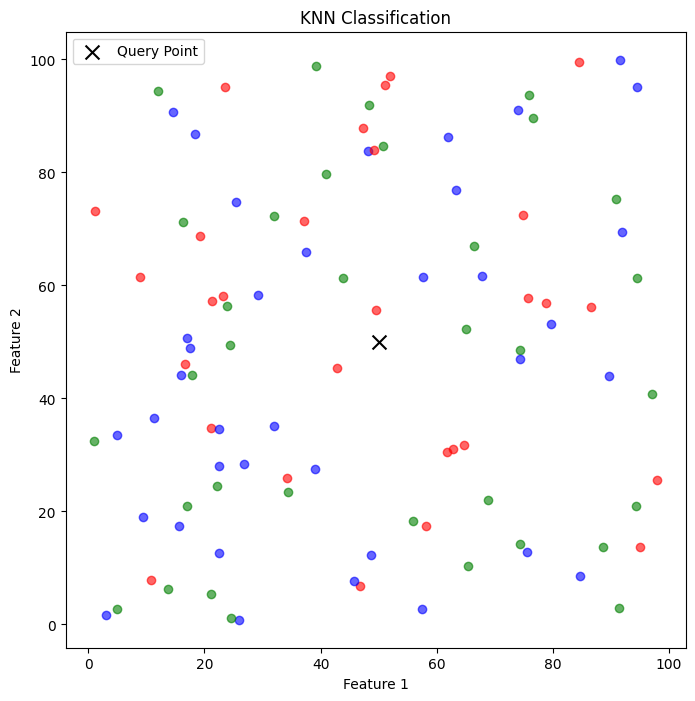

In [6]:
import random
import math
import matplotlib.pyplot as plt

# Generate synthetic data
def generate_data(num_points, dimensions, num_classes):
    data = []
    for _ in range(num_points):
        point = [random.uniform(0, 100) for _ in range(dimensions)]
        label = random.randint(0, num_classes - 1)
        data.append((point, label))
    return data

def euclidian_distance(p1, p2):
    return math.sqrt(sum((p1-p2) **2 for p1, p2 in zip(p1,p2)))

def knn_predict(data, query, k):
    distances = [(euclidian_distance(query,X), label) for X, label in data]
    sorted_distances = sorted(distances, key=lambda x: x[0])
    neighbors = sorted_distances[:k]
    class_votes = {}
    for _,label in neighbors:
      if label in class_votes:
        class_votes[label] += 1
      else:
        class_votes[label] = 1
    return max(class_votes, key=class_votes.get)
# Example usage
data = generate_data(num_points=100, dimensions=2, num_classes=3)
query_point = [50, 50]
k = 5
predicted_class = knn_predict(data, query_point, k)
print("Predicted Class:", predicted_class)

# Plotting the data points
colors = ['r', 'g', 'b']  # Colors for the classes
plt.figure(figsize=(8, 8))

# Plot the data points with their class colors
for point, label in data:
    plt.scatter(point[0], point[1], color=colors[label], alpha=0.6)

# Highlight the query point
plt.scatter(query_point[0], query_point[1], color='k', marker='x', s=100, label='Query Point')

# Title and labels
plt.title('KNN Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [7]:
import random

# Generate synthetic data (for binary classification)
def generate_data(num_points, dimensions):
    data = []
    for _ in range(num_points):
        point = [random.uniform(0, 100) for _ in range(dimensions)]
        label = 1 if sum(point) > 50 * dimensions else 0  # Simple linear decision boundary
        data.append((point, label))
    return data

# Function to calculate Gini Impurity
def gini_impurity(labels):
    total = len(labels)
    if total == 0:
        return 0
    count = sum(labels)
    prob_1 = count / total
    prob_0 = 1 - prob_1
    return 1 - prob_1**2 - prob_0**2

# Function to split dataset based on a feature and threshold
def split_data(data, feature_index, threshold):
    left_split = [item for item in data if item[0][feature_index] <= threshold]
    right_split = [item for item in data if item[0][feature_index] > threshold]
    return left_split, right_split

# Function to find the best split
def find_best_split(data):
    best_gini = float('inf')
    best_split = None
    best_feature = None
    best_threshold = None

    num_features = len(data[0][0])

    for feature_index in range(num_features):
        thresholds = set(item[0][feature_index] for item in data)
        for threshold in thresholds:
            left_split, right_split = split_data(data, feature_index, threshold)
            left_labels = [label for _, label in left_split]
            right_labels = [label for _, label in right_split]
            gini = (len(left_split) / len(data)) * gini_impurity(left_labels) + \
                   (len(right_split) / len(data)) * gini_impurity(right_labels)
            if gini < best_gini:
                best_gini = gini
                best_split = (left_split, right_split)
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold, best_split

# Decision Tree Node
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

# Function to build the decision tree
def build_tree(data, max_depth, current_depth=0):
    labels = [label for _, label in data]
    if len(set(labels)) == 1 or current_depth == max_depth:
        return Node(value=labels[0])

    feature_index, threshold, (left_split, right_split) = find_best_split(data)

    if not left_split or not right_split:
        return Node(value=max(set(labels), key=labels.count))

    left_child = build_tree(left_split, max_depth, current_depth + 1)
    right_child = build_tree(right_split, max_depth, current_depth + 1)

    return Node(feature_index=feature_index, threshold=threshold, left=left_child, right=right_child)

# Function to predict using the decision tree
def predict(node, sample):
    if node.value is not None:
        return node.value
    if sample[node.feature_index] <= node.threshold:
        return predict(node.left, sample)
    else:
        return predict(node.right, sample)

# Example usage
data = generate_data(num_points=100, dimensions=2)
tree = build_tree(data, max_depth=3)

# Predict on a sample
sample = [30, 40]
print("Predicted Class:", predict(tree, sample))

Predicted Class: 1


In [8]:
# Logistics Regression
import math
import random

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

# Hypothesis function
def predict_proba(X, theta):
    z = sum(x * t for x, t in zip(X, theta))
    return sigmoid(z)

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    total_cost = 0
    for i in range(m):
        h = predict_proba(X[i], theta)
        total_cost += -y[i] * math.log(h) - (1 - y[i]) * math.log(1 - h)
    return total_cost / m

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    for _ in range(num_iterations):
        gradients = [0] * len(theta)
        for i in range(m):
            h = predict_proba(X[i], theta)
            for j in range(len(theta)):
                gradients[j] += (h - y[i]) * X[i][j]
        theta = [t - learning_rate * g / m for t, g in zip(theta, gradients)]
    return theta

# Example dataset
data = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(100)]
labels = [1 if x[0] + x[1] > 100 else 0 for x in data]
X = [[1] + list(x) for x in data]  # Add intercept term (bias)
y = labels

# Initialize parameters
theta = [0] * len(X[0])
learning_rate = 0.01
num_iterations = 1000

# Train logistic regression model
theta = gradient_descent(X, y, theta, learning_rate, num_iterations)

# Predict for a new sample
sample = [1, 45, 55]  # Add intercept term
probability = predict_proba(sample, theta)
predicted_class = 1 if probability >= 0.5 else 0
print("Predicted Probability:", probability)
print("Predicted Class:", predicted_class)

Predicted Probability: 0.9989311218664533
Predicted Class: 1


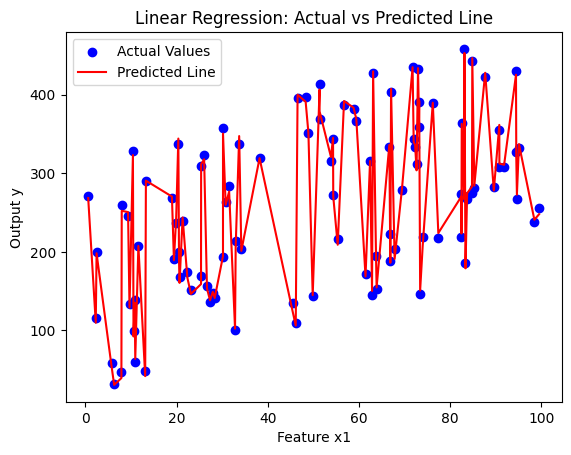

In [11]:
import random
import matplotlib.pyplot as plt

# Hypothesis function (linear combination of weights and features)
def predict(X, theta):
    return sum(x * t for x, t in zip(X, theta))

# Mean Squared Error Cost Function
def compute_mse(X, y, theta):
    m = len(y)
    total_cost = sum((predict(X[i], theta) - y[i])**2 for i in range(m))
    return total_cost / (2 * m)

# Gradient Descent for Linear Regression
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    for _ in range(num_iterations):
        gradients = [0] * len(theta)
        for i in range(m):
            error = predict(X[i], theta) - y[i]
            for j in range(len(theta)):
                gradients[j] += error * X[i][j]
        theta = [t - learning_rate * g / m for t, g in zip(theta, gradients)]
    return theta

# Example dataset
data = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(100)]
outputs = [2 * x[0] + 3 * x[1] + 5 + random.uniform(-10, 10) for x in data]  # y = 2x1 + 3x2 + 5 + noise
X = [[1] + list(x) for x in data]  # Add intercept term (bias)
y = outputs

# Initialize parameters
theta = [0] * len(X[0])
learning_rate = 0.0001
num_iterations = 1000

# Train the Linear Regression model
theta = gradient_descent(X, y, theta, learning_rate, num_iterations)

# Plotting
# Extracting x1 for plotting
x1_vals = [x[1] for x in X]
predicted_vals = [predict(x, theta) for x in X]

# Sorting for a smoother plot line
sorted_pairs = sorted(zip(x1_vals, predicted_vals))
x1_vals_sorted, predicted_vals_sorted = zip(*sorted_pairs)

# Scatter plot for actual data
plt.scatter(x1_vals, y, color='blue', label='Actual Values')

# Line plot for predicted values
plt.plot(x1_vals_sorted, predicted_vals_sorted, color='red', label='Predicted Line')

# Labels and legend
plt.xlabel('Feature x1')
plt.ylabel('Output y')
plt.title('Linear Regression: Actual vs Predicted Line')
plt.legend()
plt.show()

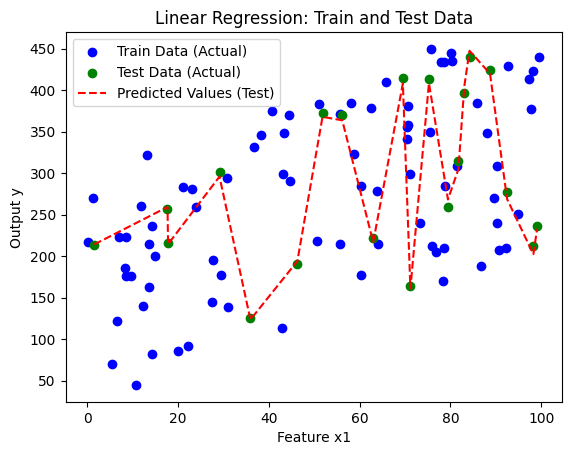

Mean Squared Error on Test Data: 18.105704575012957


In [15]:
import random
import matplotlib.pyplot as plt

# Hypothesis function (linear combination of weights and features)
def predict(X, theta):
    return sum(x * t for x, t in zip(X, theta))

# Mean Squared Error Cost Function
def compute_mse(X, y, theta):
    m = len(y)
    total_cost = sum((predict(X[i], theta) - y[i])**2 for i in range(m))
    return total_cost / (2 * m)

# Gradient Descent for Linear Regression
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    for _ in range(num_iterations):
        gradients = [0] * len(theta)
        for i in range(m):
            error = predict(X[i], theta) - y[i]
            for j in range(len(theta)):
                gradients[j] += error * X[i][j]
        theta = [t - learning_rate * g / m for t, g in zip(theta, gradients)]
    return theta

# Train-Test Split
def train_test_split(X, y, test_size=0.2):
    data = list(zip(X, y))
    random.shuffle(data)
    split_index = int(len(data) * (1 - test_size))
    train_data, test_data = data[:split_index], data[split_index:]
    X_train, y_train = zip(*train_data)
    X_test, y_test = zip(*test_data)
    return list(X_train), list(y_train), list(X_test), list(y_test)

# Example dataset
data = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(100)]
outputs = [2 * x[0] + 3 * x[1] + 5 + random.uniform(-10, 10) for x in data]  # y = 2x1 + 3x2 + 5 + noise
X = [[1] + list(x) for x in data]  # Add intercept term (bias)
y = outputs

# Split the dataset
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

# Initialize parameters
theta = [0] * len(X[0])
learning_rate = 0.0001
num_iterations = 1000

# Train the Linear Regression model
theta = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

# Predictions on test set
predicted_vals_test = [predict(x, theta) for x in X_test]

# Extract x1 for plotting
x1_train_vals = [x[1] for x in X_train]
x1_test_vals = [x[1] for x in X_test]

# Sorting for a smoother plot line
sorted_pairs_test = sorted(zip(x1_test_vals, predicted_vals_test))
x1_test_sorted, predicted_test_sorted = zip(*sorted_pairs_test)

# Plotting
plt.scatter(x1_train_vals, y_train, color='blue', label='Train Data (Actual)')
plt.scatter(x1_test_vals, y_test, color='green', label='Test Data (Actual)')
plt.plot(x1_test_sorted, predicted_test_sorted, color='red', label='Predicted Values (Test)', linestyle='dashed')

# Labels and legend
plt.xlabel('Feature x1')
plt.ylabel('Output y')
plt.title('Linear Regression: Train and Test Data')
plt.legend()
plt.show()

# Evaluate on test data
mse_test = compute_mse(X_test, y_test, theta)
print("Mean Squared Error on Test Data:", mse_test)

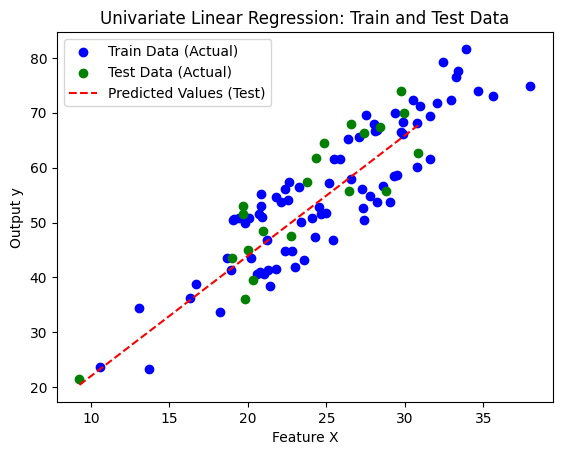

Mean Squared Error on Test Data: 19.892196758648122


In [17]:
import random
import matplotlib.pyplot as plt

# Hypothesis function (linear combination of weights and features)
def predict(X, theta):
    return X[0] * theta[0] + X[1] * theta[1]

# Mean Squared Error Cost Function
def compute_mse(X, y, theta):
    m = len(y)
    total_cost = sum((predict([1, X[i]], theta) - y[i])**2 for i in range(m))
    return total_cost / (2 * m)

# Gradient Descent for Linear Regression
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    for _ in range(num_iterations):
        gradients = [0, 0]
        for i in range(m):
            error = predict([1, X[i]], theta) - y[i]
            gradients[0] += error
            gradients[1] += error * X[i]
        theta[0] -= learning_rate * gradients[0] / m
        theta[1] -= learning_rate * gradients[1] / m
    return theta

# Train-Test Split
def train_test_split(X, y, test_size=0.2):
    data = list(zip(X, y))
    random.shuffle(data)
    split_index = int(len(data) * (1 - test_size))
    train_data, test_data = data[:split_index], data[split_index:]
    X_train, y_train = zip(*train_data)
    X_test, y_test = zip(*test_data)
    return list(X_train), list(y_train), list(X_test), list(y_test)

# Example univariate dataset
X = [random.gauss(25, 5) for _ in range(100)]
y = [2 * x + 5 + random.uniform(-10, 10) for x in X]  # y = 2x + 5 + noise

# Split the dataset
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

# Initialize parameters
theta = [0, 0]  # [bias, weight]
learning_rate = 0.0001
num_iterations = 1000

# Train the Linear Regression model
theta = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

# Predictions on test set
predicted_vals_test = [predict([1, x], theta) for x in X_test]

# Sorting for a smoother plot line
sorted_pairs_test = sorted(zip(X_test, predicted_vals_test))
X_test_sorted, predicted_test_sorted = zip(*sorted_pairs_test)

# Plotting
plt.scatter(X_train, y_train, color='blue', label='Train Data (Actual)')
plt.scatter(X_test, y_test, color='green', label='Test Data (Actual)')
plt.plot(X_test_sorted, predicted_test_sorted, color='red', label='Predicted Values (Test)', linestyle='dashed')

# Labels and legend
plt.xlabel('Feature X')
plt.ylabel('Output y')
plt.title('Univariate Linear Regression: Train and Test Data')
plt.legend()
plt.show()

# Evaluate on test data
mse_test = compute_mse(X_test, y_test, theta)
print("Mean Squared Error on Test Data:", mse_test)

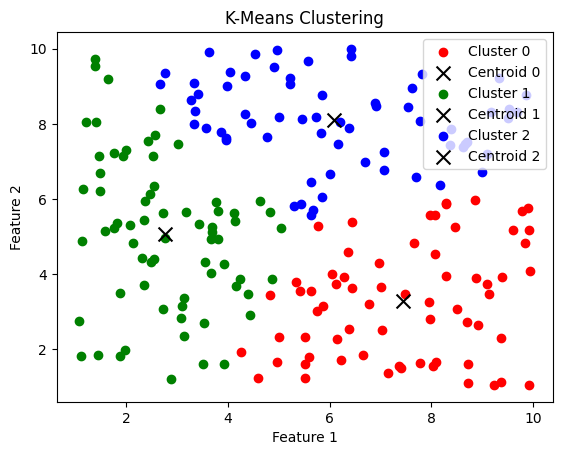

In [56]:
# Step 6: Plot the results
colors = ['r', 'g', 'b']
for i in range(k):
    cluster_points = np.array(clusters[i])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}')
    plt.scatter(centroids[i][0], centroids[i][1], c='black', marker='x', s=100, label=f'Centroid {i}')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

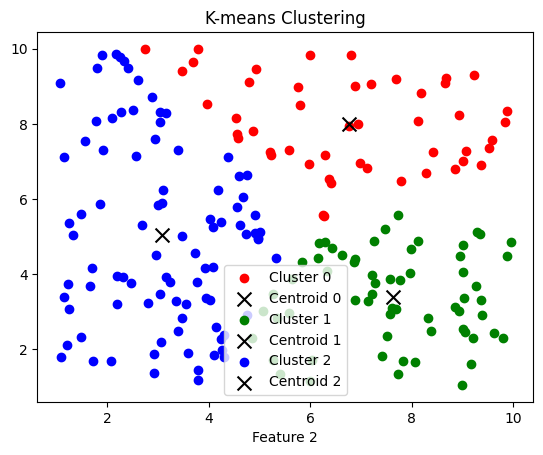

In [65]:
colors = ['r', 'g', 'b']

for i in range(k):
  cluster_points = np.array(clusters[i])
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label= f"Cluster {i}")
  plt.scatter(centroids[i][0], centroids[i][1], c='black', marker="x", s=100, label=f"Centroid {i}")


plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")
plt.legend()
plt.show()

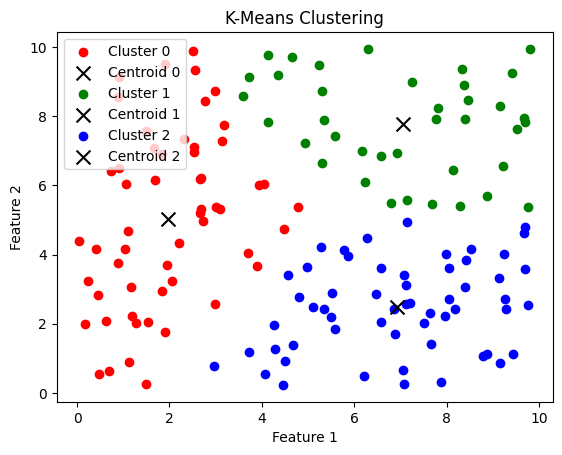

In [13]:
# Step 6: Plot the results
colors = ['r', 'g', 'b']
for i in range(k):
    cluster_points = np.array(clusters[i])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}')
    plt.scatter(centroids[i][0], centroids[i][1], c='black', marker='x', s=100, label=f'Centroid {i}')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Or, if you are using an IDE, just type the following code



In [ ]:
pip install pytrends

After executing the above code you should get a successful message as shown above



---



# Implementation

## Connecting to Google

You must connect to Google first because after all, we are requesting the Google trending topics from Google Trends. For this, we need to import the method called `TrendReq` from `pytrends.request` library. Also, I will import the pandas library to store and visualize the data which you see in the later tutorial.

In [ ]:
import pandas as pd
from pytrends.request import TrendReq
pytrend = TrendReq()



---



## Interest By Region

Let us see the terms which are popular in the region worldwide. I will choose, the term to be searched as "Taylor Swift" (I like her so….).

In [ ]:
pytrend.build_payload(kw_list=['Taylor Swift'])
# Interest by Region
df = pytrend.interest_by_region()
df.head(10)

,Taylor Swift
geoName,
Afghanistan,0
Albania,0
Algeria,16
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


**Now you might be thinking what are the values, what do they denote?**

The values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term. Source → [Google Trends](https://support.google.com/trends/answer/4355212)..

Let us plot the result on a bar graph because sometimes visual representation gives a clear picture.

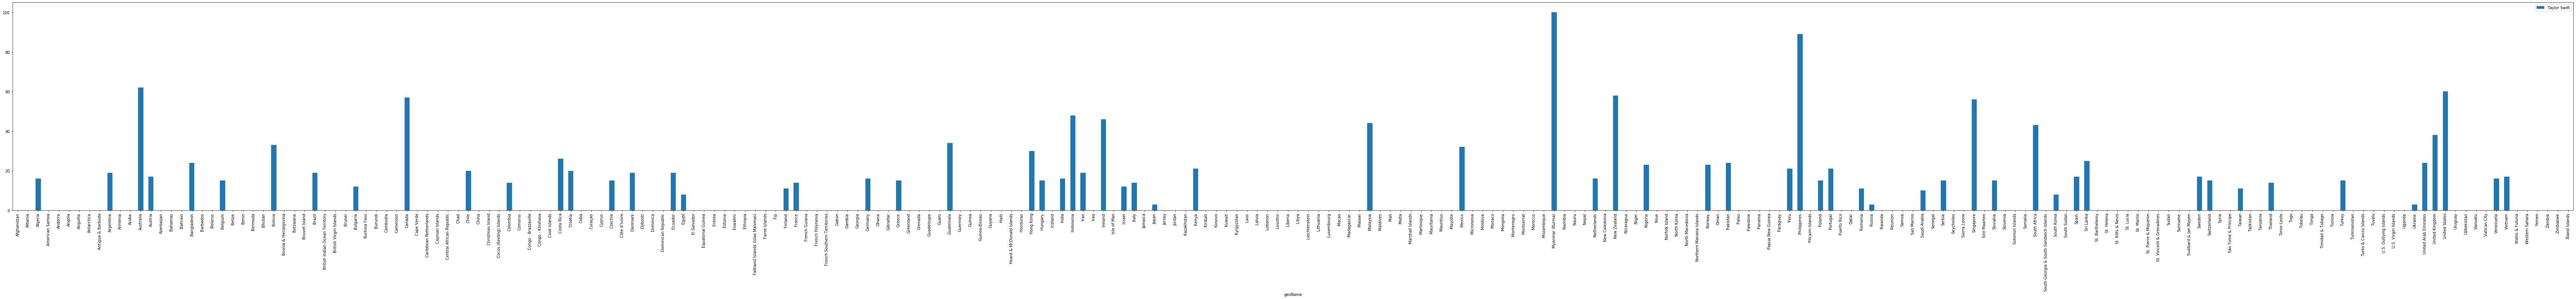

In [ ]:
df.reset_index().plot(x='geoName', y='Taylor Swift', figsize=(120, 10), kind ='bar')

Also, you use the parameter `resolution = 'COUNTRY_NAME'` to filter the results.



---



## Daily Search Trends

Now let us get the top daily search trends worldwide. To do this we have to use the `trending_searches()` method. If you want to search worldwide just don't pass any parameter.

In [ ]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='united_states')
df.head()

,0
0,South Carolina primary
1,David Byrne
2,Liverpool
3,Lakers vs Grizzlies
4,Tom Steyer


Make sure you enter the country name in lowercase `pn = "canada"` . Also, you can compare the above results with the [google trend's result](https://trends.google.com/trends/trendingsearches/daily?geo=US). To get today's trending topics just use:

In [ ]:
df = pytrend.today_searches(pn='US')



---



## Top Charts

Let us see what was trending in 2019. With the help of `top_charts` method we can get the top trending searches yearly.

In [ ]:
# Get Google Top Charts
df = pytrend.top_charts(2019, hl='en-US', tz=300, geo='GLOBAL')
df.head()

,title,exploreQuery
0,India vs South Africa,
1,Cameron Boyce,
2,Copa America,
3,Bangladesh vs India,
4,iPhone 11,


To compare the results just visit [Google Trends](https://trends.google.com/trends/yis/2019/GLOBAL/). We can specify the year and the country that we want to see the trending searches.



---



## Google Keyword Suggestions

Let us see how can we obtain google's keyword suggestion. If you don't know what I'm talking about. The below image explains things more clear.

![alt text](https://cdn-images-1.medium.com/max/1200/1*QRpWWBS1SHXBr71Jp1NwQA.png)

In [ ]:
# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='Mercedes Benz')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,Mercedes-Benz,Automobile company
1,Mercedes-Benz A-Class,Car model
2,Mercedes-Benz,Automobile make
3,Mercedes-Benz E-Class,Car model
4,Mercedes-Benz GLB-Class,Car model




---



## Related Queries

It's a common thing that when a user searches for a topic, they would also search for something related. These are called related queries. Let us see what are the related queries for the topic "***Coronavirus***". Always remember when you want to change the topic name just run the following code again with the new name as the parameter.

In [ ]:
pytrend.build_payload(kw_list=['Coronavirus'])

Now let's run the method `related_queries` which returns a dictionary full of related queries for the topic ***Coronavirus***

In [ ]:
# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                       query  value
0                     virus    100
1         virus coronavirus     95
2                    corona     92
3         china coronavirus     87
4                     china     86
5      coronavirus symptoms     83
6          news coronavirus     72
7              corona virus     61
8        coronavirus update     53
9        coronavirus italia     50
10           el coronavirus     37
11          coronavirus map     34
12        wuhan coronavirus     33
13                    wuhan     33
14        coronavirus death     31
15      what is coronavirus     31
16        coronavirus cases     30
17          coronavirus usa     30
18     sintomas coronavirus     30
19           uk coronavirus     23
20           us coronavirus     23
21  symptoms of coronavirus     22
22       coronavirus latest     20
23         coronavirus live     20
24     coronavirus in china     20, 'rising':                          query   value
0            wuhan 

Similarly, you can also search for the related topics just run the below code to do so:

In [ ]:
# Related Topics, returns a dictionary of dataframes
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':      value  ...            topic_type
0   175600  ...         City in China
1    47900  ...        Italian region
2    27350  ...           Cooperative
3    26650  ...        Italian region
4    18550  ...                 Topic
5    17800  ...        Italian region
6    17600  ...               Website
7    15150  ...                 Topic
8    13550  ...        Italian region
9    12450  ...                Animal
10   11000  ...                 Topic
11   10500  ...                 Topic
12    9950  ...      Water navigation
13    9400  ...                 Topic
14    2800  ...       Spoken language
15    2400  ...          Ethnic group
16    2250  ...  Country in East Asia
17    2100  ...     Country in Europe
18    1050  ...                 Topic
19     500  ...                 Topic

[20 rows x 6 columns], 'top':     value  ...            topic_type
0     100  ...                 Virus
1       8  ...                 Topic
2       5  ...  Country in East Asia



---



This is the end of the tutorial, I hope you guys have learned a thing or two. If you guys have any doubts regarding the tutorial let me know via the comment section. Although this is a short tutorial there is a lot to learn. Alright see you in my next tutorial, have a good day!!!